In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import librosa
import librosa.display
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from keras.src.callbacks import ReduceLROnPlateau

In [4]:
DATA_TRAIN = "C:\\Users\\s5pen\\YandexDisk\\ВКР\\crowd_train\\raw_crowd_train.tsv"
AUDIO_TRAIN = "C:\\Users\\s5pen\\YandexDisk\\ВКР\\crowd_train\\wavs\\"

DATA_TEST = "C:\\Users\\s5pen\\YandexDisk\\ВКР\\crowd_test\\raw_crowd_test.tsv"
AUDIO_TEST = "C:\\Users\\s5pen\\YandexDisk\\ВКР\\crowd_test\\wavs\\"

data_train = pd.read_csv(DATA_TRAIN, delimiter='\t')
EPOCH = 60
data_train

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id
0,475e76f77ac1ed7cabafca740b15b32a,wavs/475e76f77ac1ed7cabafca740b15b32a.wav,2.453000,angry,NaN,858305a5450b7bd1288ba0053b1cd1c1,не надо не надо не надо не надо,angry,fa136da095807ea6cd18dd6e2f58d4d0
1,2f9438ef68395c70a8714dc373a49d11,wavs/2f9438ef68395c70a8714dc373a49d11.wav,4.640000,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,фозил кори mp три,neutral,3d436884cbbe25373914f8768de494f7
2,9937036a9c0dba20eecbffddd00f2be2,wavs/9937036a9c0dba20eecbffddd00f2be2.wav,4.341750,neutral,2.0,858305a5450b7bd1288ba0053b1cd1c1,NaN,NaN,NaN
3,fb0ae78586a235018103acec22a80a8f,wavs/fb0ae78586a235018103acec22a80a8f.wav,3.900562,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,сколько стоит на керамбит,neutral,80bc833cf6b3f106d2e8991783a31e2b
4,196dcf9e1aaac46c2aee45e7f6adfb92,wavs/196dcf9e1aaac46c2aee45e7f6adfb92.wav,4.780000,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,афина когда закончится эта телепередача,neutral,bd78f079676fa5f1ed17253c9a440cc6
...,...,...,...,...,...,...,...,...,...
906948,dc1e379757b50ea57ba0d86fa2cfbc2e,wavs/dc1e379757b50ea57ba0d86fa2cfbc2e.wav,4.159625,sad,2.0,cff125aa5153b7677dd28377337dcd2f,индийские фильмы индийские,sad,037539580d1e28a834912088be1b81b0
906949,d923edeb05adcebc215d9ae9d9655a0a,wavs/d923edeb05adcebc215d9ae9d9655a0a.wav,3.784438,neutral,2.0,cff125aa5153b7677dd28377337dcd2f,сериал метро,sad,795e545977414fa4f915249f451d24f8
906950,b5dd4c4fd8f9e1f6f2b77041e0a69fe4,wavs/b5dd4c4fd8f9e1f6f2b77041e0a69fe4.wav,2.722938,neutral,2.0,6a059476b07f0467b9474fc47537784e,смотреть ужасы про крыс,sad,49fe520fd45da95b7c575e3db07846d2
906951,593277832bed252bf5f321223d5d08f4,wavs/593277832bed252bf5f321223d5d08f4.wav,3.349000,neutral,NaN,6a059476b07f0467b9474fc47537784e,мороженщик в реальной жизни,neutral,4de2287e6b082e4f652050eba71d21b2


In [5]:
def create_tsv_file_for_N_records(value: int):
    # Равное количество записей для каждой эмоции
    emotions = ['angry', 'neutral', 'sad', 'positive']
    records_per_emotion = value // len(emotions)

    # Пустой DataFrame для хранения выбранных записей
    selected_data = pd.DataFrame(columns=data_train.columns)

    # Выбор равного количества записей для каждой эмоции
    for emo in emotions:
        emo_data = data_train[(data_train['annotator_emo'] == emo) & (data_train['speaker_emo'] == emo)].head(
            records_per_emotion)
        selected_data = pd.concat([selected_data, emo_data])

    # Путь для сохранения нового файла
    raw_crowd_train = f"C:\\Users\\s5pen\\DataSpellProjects\\SER\\data_tcv\\raw_crowd_train_{value}.tsv"

    # Сохранение выбранных данных в новом TSV файле
    selected_data.to_csv(raw_crowd_train, sep='\t', index=False)

In [6]:
create_tsv_file_for_N_records(50000)

In [7]:
# data_10_records = pd.read_csv("C:\\Users\\s5pen\\DataSpellProjects\\SER\\data_tcv\\raw_crowd_train_10.tsv",
#                               delimiter='\t')
# data_200_records = pd.read_csv("C:\\Users\\s5pen\\DataSpellProjects\\SER\\data_tcv\\raw_crowd_train_200.tsv",
#                                delimiter='\t')
# first_40_records = data_train.head(40);
# data_400_records = pd.read_csv("C:\\Users\\s5pen\\DataSpellProjects\\SER\\data_tcv\\raw_crowd_train_400.tsv",
#                                 delimiter='\t')
# data_1000_records = pd.read_csv("C:\\Users\\s5pen\\DataSpellProjects\\SER\\data_tcv\\raw_crowd_train_1000.tsv",
#                                 delimiter='\t')
# data_2000_records = pd.read_csv("C:\\Users\\s5pen\\DataSpellProjects\\SER\\data_tcv\\raw_crowd_train_2000.tsv",
#                                 delimiter='\t')
# data_5000_records = pd.read_csv("C:\\Users\\s5pen\\DataSpellProjects\\SER\\data_tcv\\raw_crowd_train_5000.tsv",
#                                 delimiter='\t')
# data_10_000_records = pd.read_csv("C:\\Users\\s5pen\\DataS`pellProjects\\SER\\data_tcv\\raw_crowd_train_10000.tsv",
#                                   delimiter='\t')
# data_15_000_records = pd.read_csv("C:\\Users\\s5pen\\DataSpellProjects\\SER\\data_tcv\\raw_crowd_train_15000.tsv",
#                                   delimiter='\t')
# data_25_000_records = pd.read_csv("C:\\Users\\s5pen\\DataSpellProjects\\SER\\data_tcv\\raw_crowd_train_25000.tsv",
#                                   delimiter='\t')
data_50_000_records = pd.read_csv("C:\\Users\\s5pen\\DataSpellProjects\\SER\\data_tcv\\raw_crowd_train_50000.tsv",
                                  delimiter='\t')

In [8]:
# Извлечение признаков #EXPEREREMETN

def extract_zcr(data):
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    return zcr

def extract_mel_spectrogram(data, sample_rate):
    mel_spectrogram = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    return mel_spectrogram

def extract_mfcc(data, sample_rate):
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    return mfcc

def extract_chroma_stft(data, sample_rate):
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    return chroma_stft

def extract_features(data_path, emotions):
    X, Y = [], []
    for path, emotion in zip(data_path, emotions):
        data, sample_rate = librosa.load(path)

        zcr = extract_zcr(data)
        mel_spectrogram = extract_mel_spectrogram(data, sample_rate)
        mfcc = extract_mfcc(data, sample_rate)
        # chroma_stft = extract_chroma_stft(data, sample_rate)
 
        features = np.hstack((zcr, mel_spectrogram, mfcc))#, chroma_stft
        X.append(features)
        Y.append(emotion)

    return np.array(X), np.array(Y)

In [14]:
# Чтение CSV-файла
df = pd.read_csv('C:\\Users\\s5pen\\DataSpellProjects\\SER\\features\\features_25000.csv')

features = df.drop(columns=['labels']) 
emotion = df['labels']

In [15]:
audio_path = AUDIO_TRAIN + data_50_000_records.hash_id + ".wav"
emotions = data_50_000_records.annotator_emo

X, Y = extract_features(audio_path, emotions)

In [16]:
# Создание DataFrame
# columns = ["zcr_" + str(i) for i in range(X.shape[1] // 4)] + \
#           ["mel_spectrogram_" + str(i) for i in range(X.shape[1] // 4)] + \
#           ["mfcc_" + str(i) for i in range(X.shape[1] // 4)] + \
#           ["chroma_stft_" + str(i) for i in range(X.shape[1] // 4)]
# print(len(columns))

# Features = pd.DataFrame(X, columns=columns)
Features = pd.DataFrame(X)
Features['labels'] = Y
# Сохранение в CSV
Features.to_csv('C:\\Users\\s5pen\\DataSpellProjects\\SER\\features\\features_50000_3.csv', index=False)

In [17]:
Features.head(10)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,labels
0,0.088770,0.003593,0.003254,0.004032,0.005679,0.009542,0.018896,0.114971,2.288676,21.204687,...,-21.202806,-9.148817,-10.404701,-5.717205,-17.145027,-5.964463,-7.239069,-8.741364,-0.796954,angry
1,0.098176,0.003075,0.006245,0.009009,0.009664,0.023488,0.189075,1.870529,4.468801,0.747958,...,-4.024476,2.607695,-6.076894,1.788996,-13.882847,-1.011422,-10.493519,-2.404035,-0.048217,angry
2,0.090318,0.013847,0.007519,0.020812,0.280574,0.865945,0.629718,0.136475,0.045245,0.083296,...,-3.719522,4.578834,-1.547342,1.562086,-1.698034,-0.910471,0.537105,-0.979938,-0.477067,angry
3,0.061781,0.062770,0.001098,0.000332,0.000459,0.003091,0.057495,0.254374,0.200791,0.014717,...,2.649911,10.943318,2.090595,9.503811,-1.452432,4.978455,-0.618677,0.695358,2.992615,angry
4,0.076342,0.146882,0.019662,0.170071,0.667507,3.569432,5.367764,3.936160,2.306639,1.671333,...,-0.173759,6.277621,-5.593781,4.190726,-3.381409,3.538195,-4.644832,-2.135766,0.128233,angry
5,0.156747,0.000012,0.000222,0.001125,0.003101,0.066372,1.385856,4.740966,3.856453,0.823447,...,-11.298983,-0.367016,-12.619573,1.616382,-13.307976,-4.612016,-11.045315,-5.999075,-3.146274,angry
6,0.151597,0.013328,0.003204,0.002454,0.001377,0.003273,0.021732,0.093331,1.503149,3.548562,...,-2.579034,5.570256,-9.332885,6.860312,-11.893328,3.947775,-1.749361,-2.036388,1.504639,angry
7,0.160509,0.000061,0.000735,0.002186,0.003368,0.006911,0.131954,1.587441,5.514123,35.907700,...,-17.034803,-1.770845,-13.737533,1.971462,-16.638319,2.586565,-9.462280,-9.492577,-1.489449,angry
8,0.088770,0.003593,0.003254,0.004032,0.005679,0.009542,0.018896,0.114971,2.288676,21.204687,...,-21.202806,-9.148817,-10.404701,-5.717205,-17.145027,-5.964463,-7.239069,-8.741364,-0.796954,angry
9,0.200269,0.000090,0.000594,0.001580,0.001563,0.005485,0.042877,0.804246,3.219565,2.007705,...,-12.871252,1.329481,-11.171005,6.123934,-16.098930,1.942443,-8.583130,-5.226601,-2.613447,angry


In [18]:
len(X), len(Y), audio_path.shape

(50000, 50000, (50000,))

In [19]:
### Подготовка данных

X = Features.iloc[:, :-1].values
Y = Features['labels'].values

In [20]:
encoder = OneHotEncoder()  # As this is a multiclass classification problem onehotencoding our Y.
Y = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()

In [21]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((37500, 149), (37500, 4), (12500, 149), (12500, 4))

In [29]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((37500, 149), (37500, 4), (12500, 149), (12500, 1))

In [28]:
model = Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=4, activation='softmax'))  # unites - количество эмоций для обучения
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 149, 256)          1536      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 75, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 75, 256)           327936    
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 38, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 38, 128)           163968    
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 19, 128)          

In [ ]:
#Обучение
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history = model.fit(x_train, y_train, batch_size=64, epochs=EPOCH, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/60
586/586 [==============================] - 138s 232ms/step - loss: 1.3228 - accuracy: 0.3394 - val_loss: 1.2845 - val_accuracy: 0.3818 - lr: 0.0010
Epoch 2/60
586/586 [==============================] - 143s 244ms/step - loss: 1.2872 - accuracy: 0.3774 - val_loss: 1.2460 - val_accuracy: 0.4244 - lr: 0.0010
Epoch 3/60
586/586 [==============================] - 154s 263ms/step - loss: 1.2604 - accuracy: 0.4037 - val_loss: 1.2290 - val_accuracy: 0.4202 - lr: 0.0010
Epoch 4/60
586/586 [==============================] - 142s 243ms/step - loss: 1.2359 - accuracy: 0.4177 - val_loss: 1.2118 - val_accuracy: 0.4311 - lr: 0.0010
Epoch 5/60
586/586 [==============================] - 143s 245ms/step - loss: 1.2191 - accuracy: 0.4311 - val_loss: 1.1928 - val_accuracy: 0.4515 - lr: 0.0010
Epoch 6/60
586/586 [==============================] - 156s 266ms/step - loss: 1.1962 - accuracy: 0.4452 - val_loss: 1.1617 - val_accuracy: 0.4651 - lr: 0.0010
Epoch 7/60
586/586 [==========================

391/391 [==============================] - 21s 55ms/step - loss: 0.7075 - accuracy: 0.7946
Accuracy of our model on test data :  79.45600152015686 %


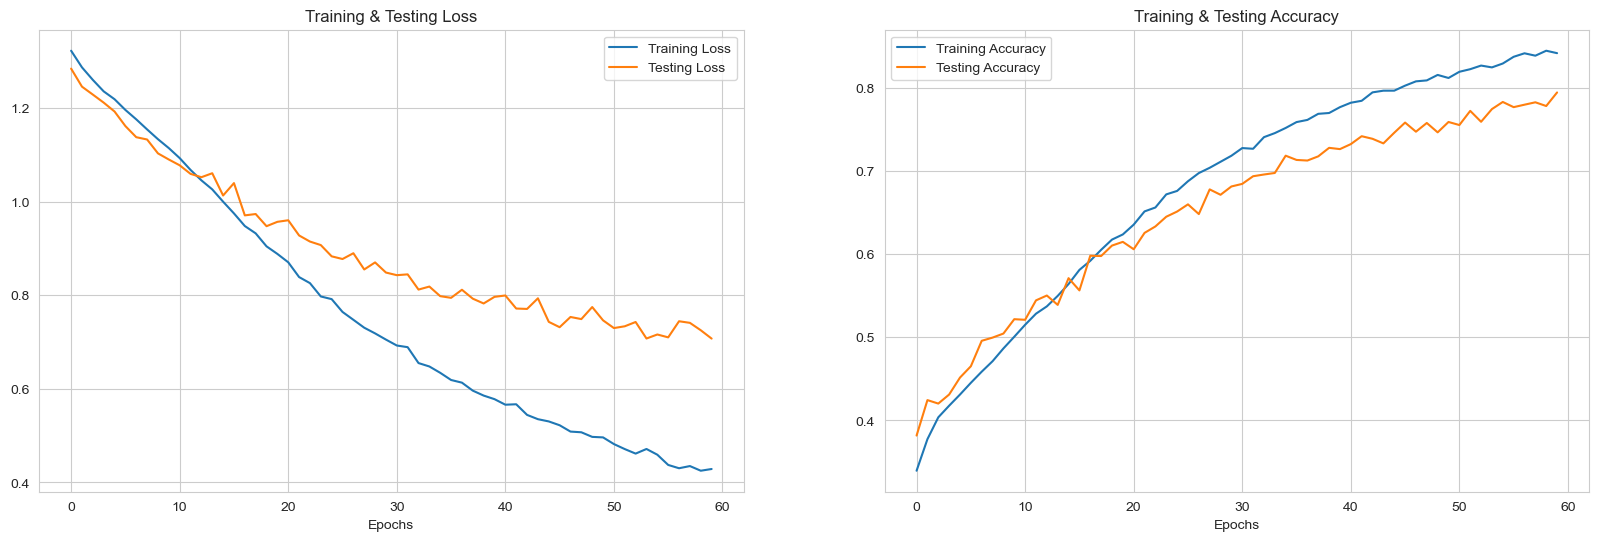

In [ ]:
print("Accuracy of our model on test data : ", model.evaluate(x_test, y_test)[1] * 100, "%")

epochs = [i for i in range(EPOCH)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20, 6)
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()



391/391 [==============================] - 23s 58ms/step


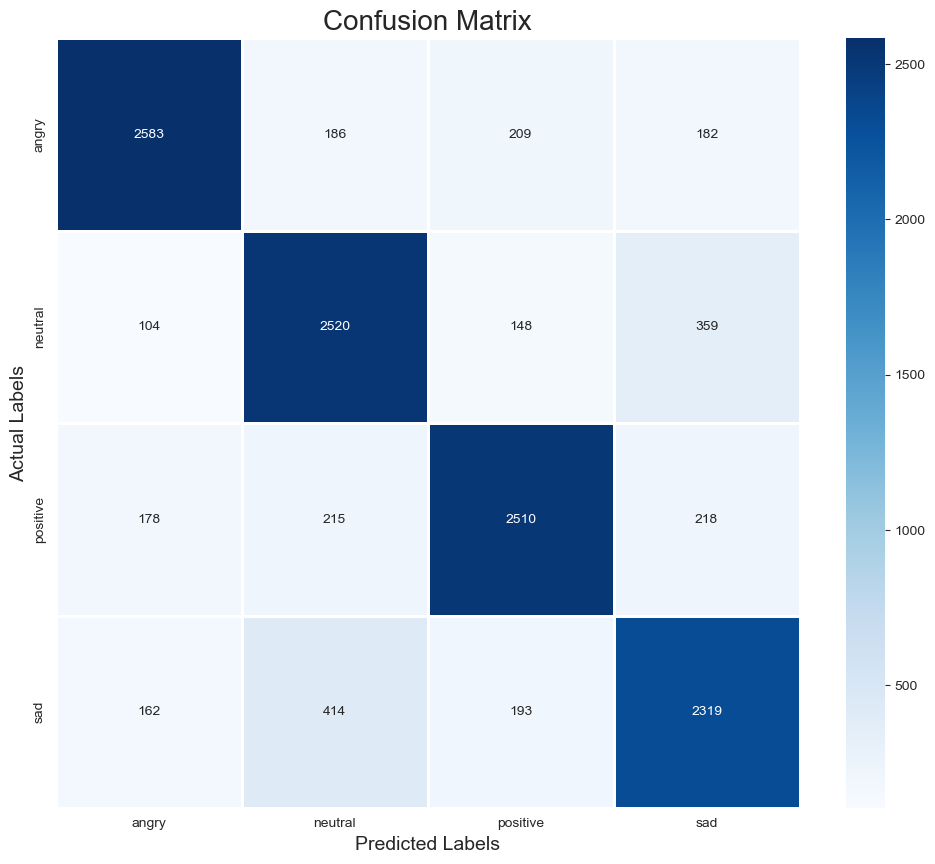

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)  
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
cm = pd.DataFrame(cm, index=[i for i in encoder.categories_], columns=[i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

In [ ]:
# df.head(10)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.85      0.82      0.83      3160
     neutral       0.76      0.80      0.78      3131
    positive       0.82      0.80      0.81      3121
         sad       0.75      0.75      0.75      3088

    accuracy                           0.79     12500
   macro avg       0.80      0.79      0.79     12500
weighted avg       0.80      0.79      0.79     12500
